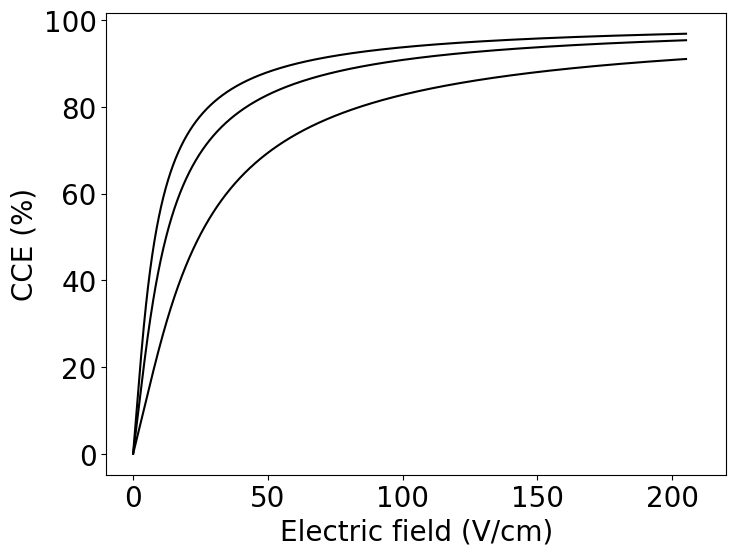

I0: 698223.55, mt: 0.0195, R2: 0.972


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import pandas as pd

# Decide excel path for mu-tau and thickness
excel_path = '/Users/yukiharuta/Desktop/Temp-Data/MAPbBr3-Paper/Hecht-plots/230531_tI_MAPbBr3-Hecht-1SUN/230531-mu-tau-with-1SUN_summary.xlsx'
# L = 0.24 # cm
L = 0.39

# plot color
color = "#01ADC1" #blue green
# color = "#EE4E74" #red pink

# Define Hecht equation
def Hecht(E, I0, mt):
    I = I0 * mt * E / L * (1 - np.exp(-L/mt/E))
    return I

# simulation what if mt = 0.01, 0.1, 0.3
mt_samples = [0.01,0.02,0.03]
sample_show = True # True or False

# Read the data
df = pd.read_excel(excel_path)
Vs = df['V'] # applied voltage (V)
Is = df['I (nA/cm2)'] # response current density (nA/cm2)
Is_err = df['I_err'] # stdev of I

Es = [n/L for n in Vs] # electric field V/cm

# initial guess for the parameters of the first peak
I0_guess = max(Is)
mt_guess = 0.005
# bounds
bounds = [[max(Is),0],[2*max(Is),1]]

# fit the Hecht function to the data
popt, pcov = curve_fit(Hecht, Es, Is, p0=[I0_guess, mt_guess], bounds=bounds)
I0_fit = popt[0]
mt_fit = popt[1]

# Prepare fitted function
X = np.arange(0.01,max(Es),0.01)
I_fit = [Hecht(n,I0_fit,mt_fit) for n in X]

# calculate R-squared value
I_fit2 = [Hecht(n,I0_fit,mt_fit) for n in Es]
R2 = r2_score(Is, I_fit2)

# Prepare CCE plots
CCE = [100*n/I0_fit for n in Is]
CCE_fit = [100*n/I0_fit for n in I_fit]
y_err = [100*n/I0_fit for n in Is_err]

# Plot CCE
# Make a figure
fig = plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 20
# plt.scatter(Es,CCE)
# plt.errorbar(Es, CCE, yerr = y_err, capsize=5, fmt='o', markersize=5, ecolor=color, markeredgecolor = color, color=color)
# plt.errorbar(Es, CCE, yerr = y_err, fmt='o')
# plt.plot(X,CCE_fit, color=color)

if sample_show:
    for mt in mt_samples:
        X_sample = np.arange(0.01,max(Es),0.01)
        Y_sample = [100*Hecht(n,I0_fit,mt)/I0_fit for n in X_sample]
        plt.plot(X_sample,Y_sample, linestyle='-', color='black')

plt.xlabel('Electric field (V/cm)')
plt.ylabel('CCE (%)')
# plt.yscale('log')
plt.xlim(-10,220)
plt.show()
print(f'I0: {I0_fit:.2f}, mt: {mt_fit:.4f}, R2: {R2:.3f}')

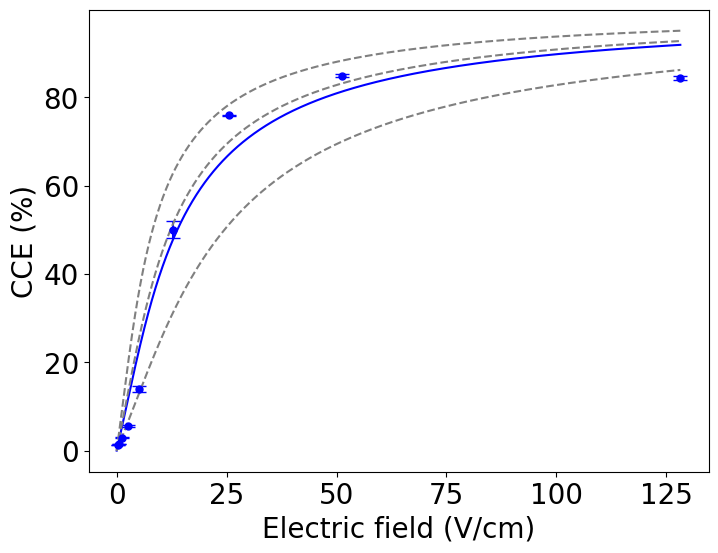

I0: 728885.65, mt: 0.0178, R2: 0.976


In [92]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import pandas as pd

# Decide excel path for mu-tau and thickness
excel_path = '/Users/yukiharuta/Desktop/Temp-Data/MAPbBr3-Paper/Hecht-plots/230531_tI_MAPbBr3-Hecht-1SUN/230531-mu-tau-with-1SUN_summary.xlsx'
L = 0.39 # cm

# Define Hecht equation
def Hecht(E, I0, mt):
    I = I0 * mt * E / L * (1 - np.exp(-L/mt/E))
    return I

# simulation what if mt = 0.01, 0.1, 0.3
mt_samples = [0.01,0.02,0.03]
sample_show = True # True or False

# Read the data
df = pd.read_excel(excel_path)
Vs = df['V'] # applied voltage (V)
Is = df['I (nA/cm2)'] # response current density (nA/cm2)
Is_err = df['I_err'] # stdev of I

Es = [n/L for n in Vs] # electric field V/cm

# initial guess for the parameters of the first peak
I0_guess = max(Is)
mt_guess = 0.005
# bounds
bounds = [[max(Is),0],[2*max(Is),1]]

# fit the Hecht function to the data
popt, pcov = curve_fit(Hecht, Es, Is, p0=[I0_guess, mt_guess], bounds=bounds)
I0_fit = popt[0]
mt_fit = popt[1]

# Prepare fitted function
X = np.arange(0.01,max(Es),0.01)
I_fit = [Hecht(n,I0_fit,mt_fit) for n in X]
        
# calculate R-squared value
I_fit2 = [Hecht(n,I0_fit,mt_fit) for n in Es]
R2 = r2_score(Is, I_fit2)

# Prepare CCE plots
CCE = [100*n/I0_fit for n in Is]
CCE_fit = [100*n/I0_fit for n in I_fit]
y_err = [100*n/I0_fit for n in Is_err]

# Plot CCE
# Make a figure
fig = plt.figure(figsize=(8,6))
plt.rcParams["font.size"] = 20
# plt.scatter(Es,CCE)
plt.errorbar(Es, CCE, yerr = y_err, capsize=5, fmt='o', markersize=5, ecolor='b', markeredgecolor = 'b', color='b')
# plt.errorbar(Es, CCE, yerr = y_err, fmt='o')
plt.plot(X,CCE_fit, color='blue')

if sample_show:
    for mt in mt_samples:
        X_sample = np.arange(0.01,max(Es),0.01)
        Y_sample = [100*Hecht(n,I0_fit,mt)/I0_fit for n in X_sample]
        plt.plot(X_sample,Y_sample, linestyle='dashed', color='gray')

plt.xlabel('Electric field (V/cm)')
plt.ylabel('CCE (%)')
# plt.yscale('log')
plt.show()
print(f'I0: {I0_fit:.2f}, mt: {mt_fit:.4f}, R2: {R2:.3f}')